In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [8]:
# upload datasets
df = pd.read_csv('data/flightsdataEDA.csv')
df.head(3).append(df.tail(3))

,fl_date,op_unique_carrier,tail_num,op_carrier_fl_num,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,share_code,origin_city,origin_state,dest_city,dest_state,arr_date,dep_datetime,arr_datetime,fl_month,fl_weekday,day_num_of_flights,num_flights_24hr,inbound_fl
0,2018-01-02 00:00:00,DL,N308DE,1124,ATL,RIC,17:25:00,1724.0,-1.0,11.0,1735.0,1836.0,4.0,18:55:00,1840.0,-15.0,0.0,NaN,0.0,N,90.0,76.0,61.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Atlanta,GA,Richmond,VA,2018-01-02 00:00:00,2018-01-02 17:25:00,2018-01-02 18:55:00,1,1,9,18,0
1,2018-01-02 00:00:00,DL,N308DE,1124,RIC,ATL,19:30:00,1923.0,-7.0,13.0,1936.0,2054.0,22.0,21:32:00,2116.0,-16.0,0.0,NaN,0.0,N,122.0,113.0,78.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Richmond,VA,Atlanta,GA,2018-01-02 00:00:00,2018-01-02 19:30:00,2018-01-02 21:32:00,1,1,1,2,1
2,2018-01-02 00:00:00,DL,N342NB,1125,CLT,ATL,19:05:00,1911.0,6.0,21.0,1932.0,2017.0,11.0,20:29:00,2028.0,-1.0,0.0,NaN,0.0,N,84.0,77.0,45.0,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Charlotte,NC,Atlanta,GA,2018-01-02 00:00:00,2018-01-02 19:05:00,2018-01-02 20:29:00,1,1,1,1,0
6920,2019-07-28 00:00:00,WN,N7873A,4154,DCA,MKE,11:00:00,1100.0,0.0,9.0,1109.0,1138.0,4.0,12:00:00,1142.0,-18.0,0.0,NaN,0.0,N,120.0,102.0,89.0,634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Washington,DC,Milwaukee,WI,2019-07-28 00:00:00,2019-07-28 11:00:00,2019-07-28 12:00:00,7,6,30,30,0
6921,2019-07-28 00:00:00,WN,N415WN,5268,DCA,MKE,18:55:00,1850.0,-5.0,10.0,1900.0,1931.0,5.0,20:05:00,1936.0,-29.0,0.0,NaN,0.0,N,130.0,106.0,91.0,634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Washington,DC,Milwaukee,WI,2019-07-28 00:00:00,2019-07-28 18:55:00,2019-07-28 20:05:00,7,6,30,26,0
6922,2019-07-28 00:00:00,WN,N486WN,4192,DCA,MSY,12:10:00,1207.0,-3.0,12.0,1219.0,1331.0,5.0,13:45:00,1336.0,-9.0,0.0,NaN,0.0,N,155.0,149.0,132.0,969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Washington,DC,New Orleans,LA,2019-07-28 00:00:00,2019-07-28 12:10:00,2019-07-28 13:45:00,7,6,30,30,0


In [9]:
df.shape

(6923, 46)

In [10]:
df.isna().sum()

fl_date                   0
op_unique_carrier         0
tail_num                  0
op_carrier_fl_num         0
origin                    0
dest                      0
crs_dep_time              0
dep_time                  0
dep_delay                 1
taxi_out                  9
wheels_off                9
wheels_on                 9
taxi_in                   9
crs_arr_time              0
arr_time                  0
arr_delay                 0
cancelled                 0
cancellation_code      6923
diverted                  0
dup                       0
crs_elapsed_time          0
actual_elapsed_time       0
air_time                  9
distance                  0
carrier_delay          5519
weather_delay          5519
nas_delay              5519
security_delay         5519
late_aircraft_delay    5519
first_dep_time         6867
total_add_gtime        6867
longest_add_gtime      6867
no_name                6923
share_code                0
origin_city               0
origin_state        

In [11]:
df.columns

Index(['fl_date', 'op_unique_carrier', 'tail_num', 'op_carrier_fl_num',
       'origin', 'dest', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out',
       'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time',
       'arr_delay', 'cancelled', 'cancellation_code', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'share_code', 'origin_city',
       'origin_state', 'dest_city', 'dest_state', 'arr_date', 'dep_datetime',
       'arr_datetime', 'fl_month', 'fl_weekday', 'day_num_of_flights',
       'num_flights_24hr', 'inbound_fl'],
      dtype='object')

In [20]:
df['op_unique_carrier'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines',
    'QX':'Horizon Air',
    'CP':'Compass Airlines',
    'AX':'Trans State',
    'G7':'GoJet Airlines',
    'ZW':'Air Wisconsin',
    'PT':'Piedmont Airlines',
    'C5':'Champlain Air',
    'EM':'Empire Airline',
    'KS':'Penair',
    '9K':'Cape Air'
}, inplace=True)

### Total Number of Flights per Airline

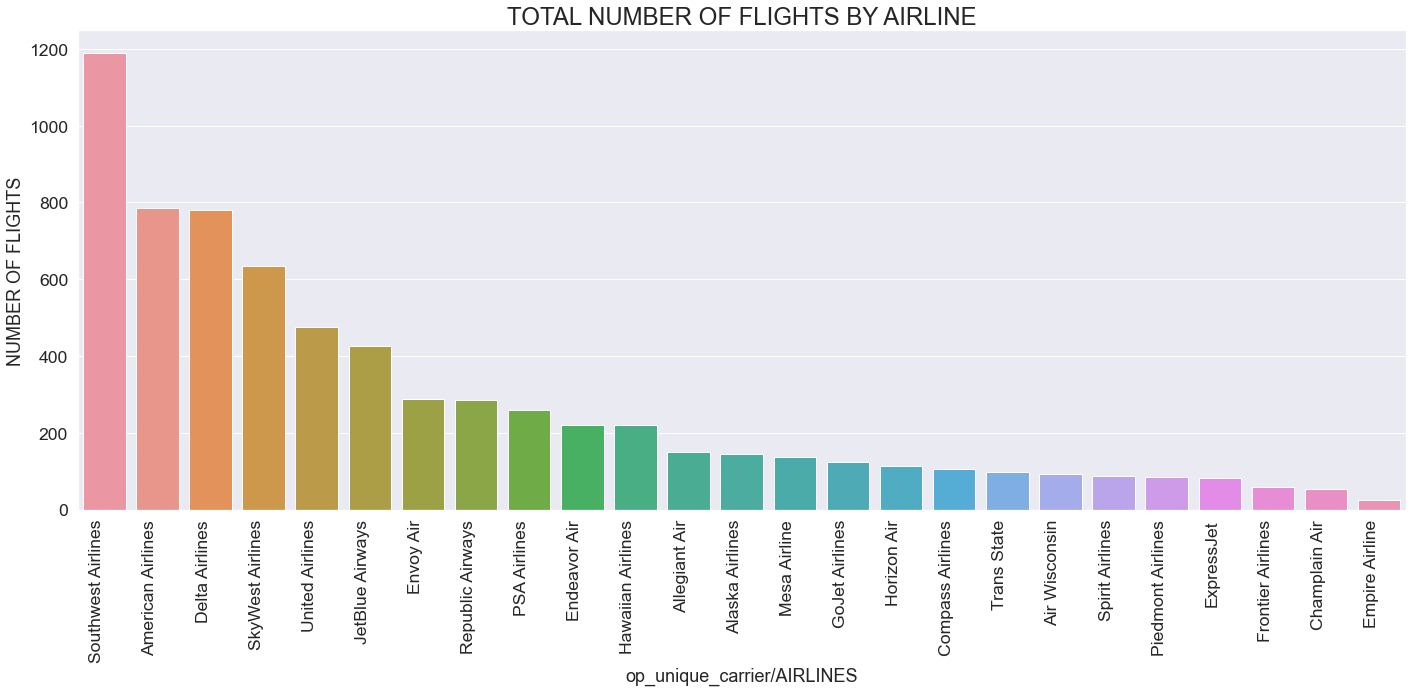

In [23]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=df['op_unique_carrier'], data=df, order=df['op_unique_carrier'].value_counts().iloc[0:28].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('op_unique_carrier/AIRLINES', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

In [25]:
df.op_unique_carrier.value_counts()

Southwest Airlines    1189
American Airlines      785
Delta Airlines         780
SkyWest Airlines       635
United Airlines        475
JetBlue Airways        425
Envoy Air              289
Republic Airways       286
PSA Airlines           260
Endeavor Air           221
Hawaiian Airlines      220
Allegiant Air          149
Alaska Airlines        145
Mesa Airline           138
GoJet Airlines         125
Horizon Air            113
Compass Airlines       106
Trans State             98
Air Wisconsin           93
Spirit Airlines         87
Piedmont Airlines       85
ExpressJet              81
Frontier Airlines       60
Champlain Air           54
Empire Airline          24
Name: op_unique_carrier, dtype: int64

## Number of Delayed Flights by Airline

In [29]:
status = []

for value in df['arr_delay']:
    if value < 0:
        status.append(0)
    else:
        status.append(1)
df['flight_status'] = status
df.head(2)   

,fl_date,op_unique_carrier,tail_num,op_carrier_fl_num,origin,dest,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,share_code,origin_city,origin_state,dest_city,dest_state,arr_date,dep_datetime,arr_datetime,fl_month,fl_weekday,day_num_of_flights,num_flights_24hr,inbound_fl,flight_status
0,2018-01-02 00:00:00,Delta Airlines,N308DE,1124,ATL,RIC,17:25:00,1724.0,-1.0,11.0,1735.0,1836.0,4.0,18:55:00,1840.0,-15.0,0.0,NaN,0.0,N,90.0,76.0,61.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Atlanta,GA,Richmond,VA,2018-01-02 00:00:00,2018-01-02 17:25:00,2018-01-02 18:55:00,1,1,9,18,0,0
1,2018-01-02 00:00:00,Delta Airlines,N308DE,1124,RIC,ATL,19:30:00,1923.0,-7.0,13.0,1936.0,2054.0,22.0,21:32:00,2116.0,-16.0,0.0,NaN,0.0,N,122.0,113.0,78.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,Richmond,VA,Atlanta,GA,2018-01-02 00:00:00,2018-01-02 19:30:00,2018-01-02 21:32:00,1,1,1,2,1,0


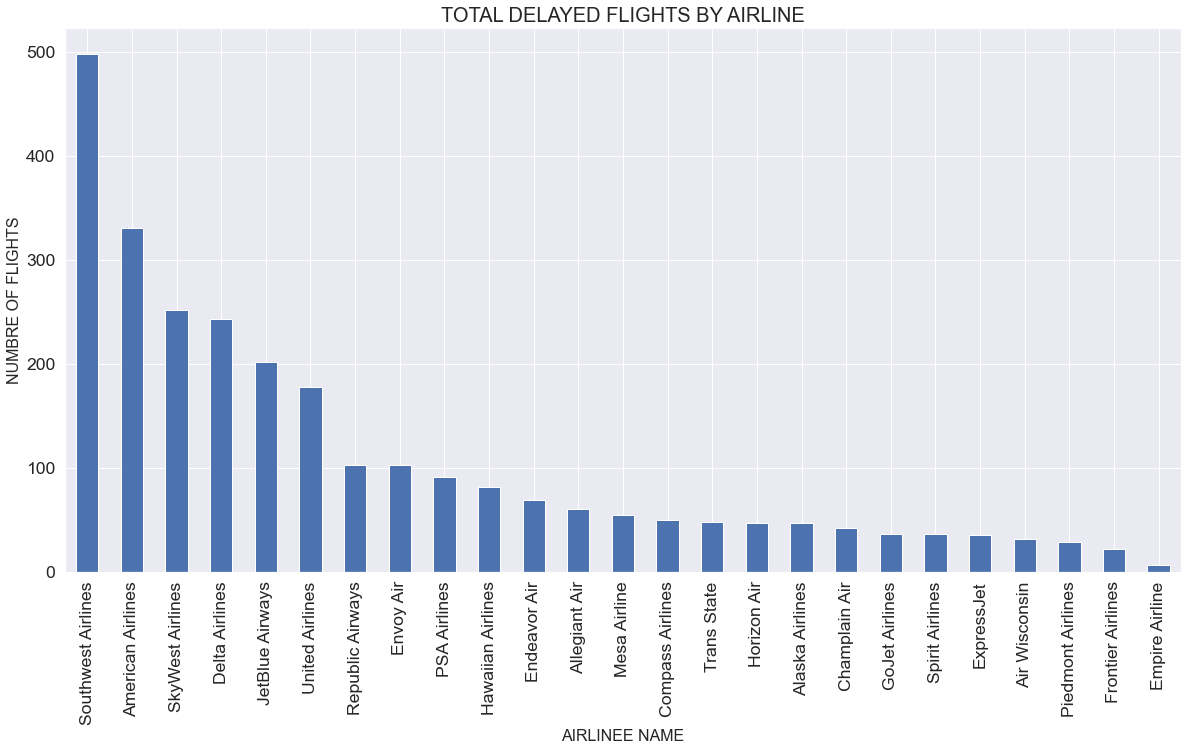

In [30]:
plt.figure(figsize=(20, 10))
df.groupby('op_unique_carrier').flight_status.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINEE NAME', fontsize=16)
plt.ylabel('NUMBRE OF FLIGHTS', fontsize=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

## Percentage of delayed flights per airline

In [32]:
df.flight_status.value_counts(normalize=True)

0    0.610285
1    0.389715
Name: flight_status, dtype: float64

In [34]:
# 1. Creating the new dataframe with the columns of my interest
df_PFD = df[['op_unique_carrier', 'flight_status']]
df_PFD.head()


,op_unique_carrier,flight_status
0,Delta Airlines,0
1,Delta Airlines,0
2,Delta Airlines,0
3,Delta Airlines,1
4,Delta Airlines,0


In [35]:
# 2. Shape to check the size of the dataframe and that we have not lost any rows for any reason
df_PFD.shape

(6923, 2)

In [36]:
# 3. Non-normalize value_count()
df_PFD.flight_status.value_counts()

0    4225
1    2698
Name: flight_status, dtype: int64

In [40]:
# 4. Create another dataframe (test_1) grouping the airline names and adding all the FLIGHT_STATUS values
# This way you will obtain all the delayed flights
test_1 = df_PFD.groupby(['op_unique_carrier']).sum().reset_index()

# 5. Create another dataframe (test_2) from the value_counts directly so that it has all the flights added per airline
# Rename the axis to OP_CARRIER and reset_index to TOTAL_FLIGHTS
test_2 = df.op_unique_carrier.value_counts().rename_axis('op_unique_carrier').reset_index(name='total_flights')

# 6. Merge the two dataframes (test_1 and test_2) using the OP_CARRIER as the common column
df_fp = pd.merge(test_1, test_2, on='op_unique_carrier')

# 7. Create a new column that will represent the percentage of delay flights
df_fp['percentage_delayed'] = round((df_fp['flight_status']*100)/df_fp['total_flights'], 2)
df_fp.rename({'flight_status': 'delayed_flights'}, axis=1, inplace=True)

# 8. Display the entire dataframe
df_fp.head(20)

,op_unique_carrier,delayed_flights,total_flights,percentage_delayed
0,Air Wisconsin,32,93,34.41
1,Alaska Airlines,47,145,32.41
2,Allegiant Air,60,149,40.27
3,American Airlines,331,785,42.17
4,Champlain Air,42,54,77.78
5,Compass Airlines,50,106,47.17
6,Delta Airlines,243,780,31.15
7,Empire Airline,7,24,29.17
8,Endeavor Air,69,221,31.22
9,Envoy Air,103,289,35.64


In [41]:
# 9. Double checking that that total delayed flights match from both sources
SUM = df_fp.delayed_flights.sum()
print('Total number of delayed flights:', SUM)

Total number of delayed flights: 2698


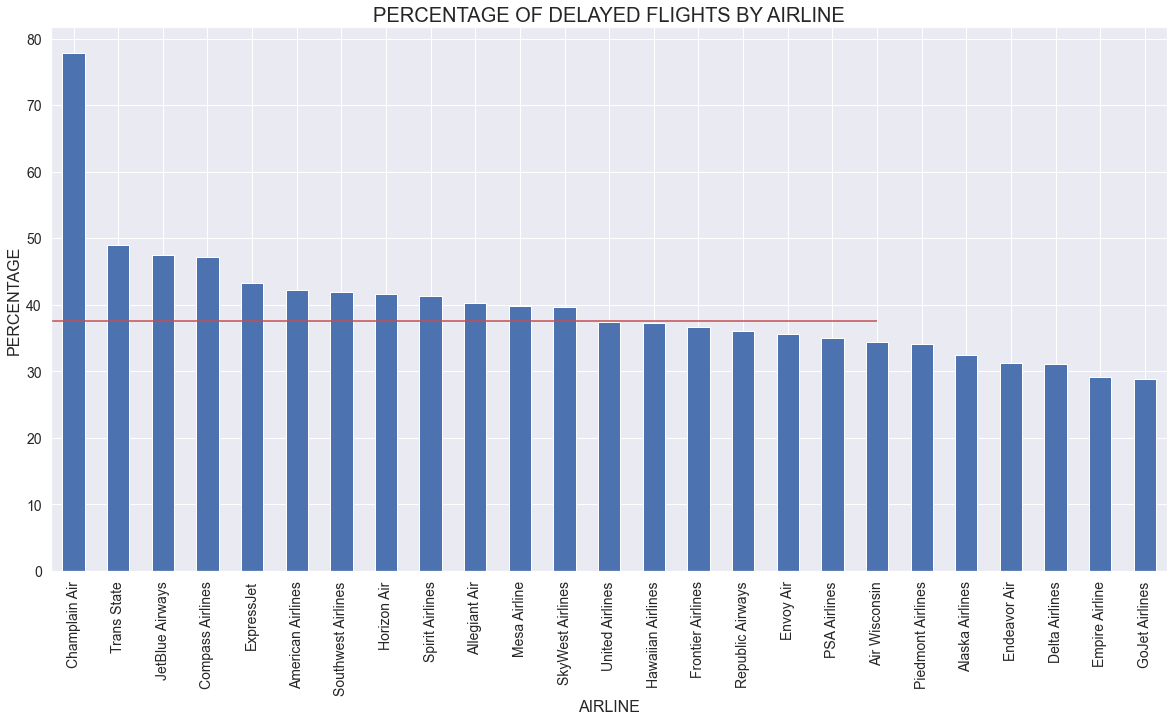

In [43]:
# 10. Plot with the 37.52% threshold value as a horizontal red line
plt.figure(figsize=(20, 10))
df_fp.groupby('op_unique_carrier').percentage_delayed.sum().sort_values(ascending=False).plot.bar(fontsize=14)
plt.hlines(y=37.52, xmin=-1, xmax=18, colors='r', linestyles='solid', label='cutoff')
plt.title('PERCENTAGE OF DELAYED FLIGHTS BY AIRLINE', fontsize=20)
plt.xlabel('AIRLINE', fontsize=16)
plt.ylabel('PERCENTAGE', fontsize=16)
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
plt.show()

## Total Minutes Delayed by Airline

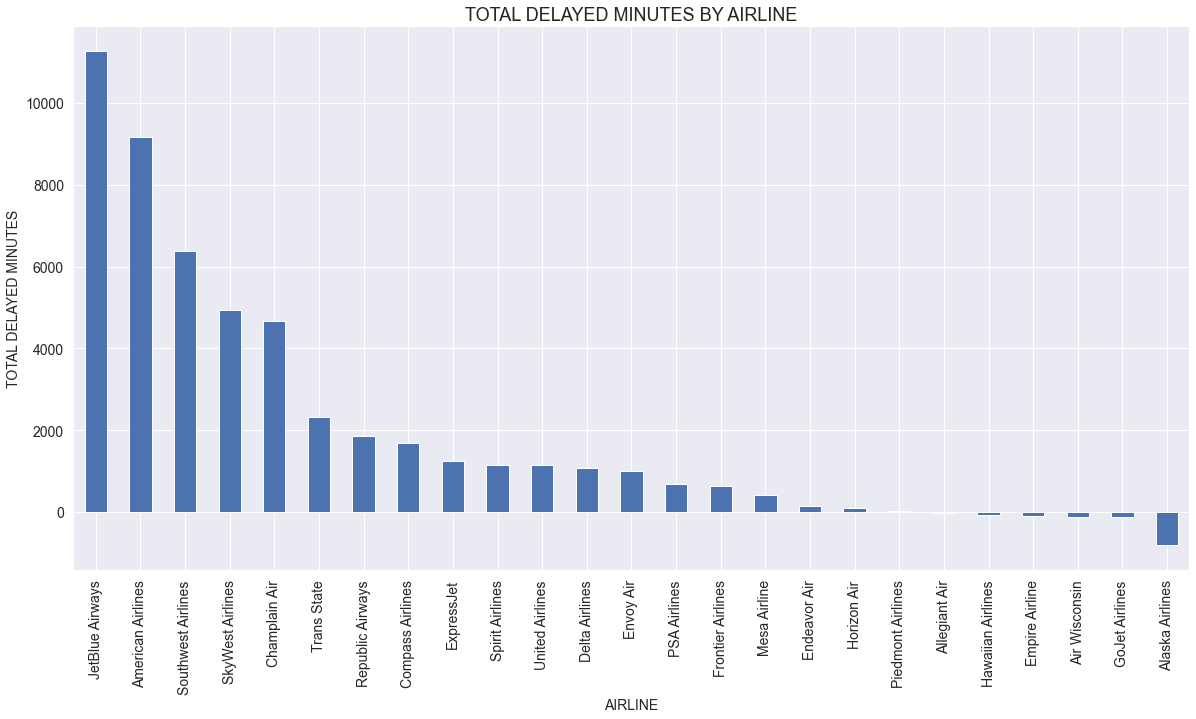

In [45]:
plt.figure(figsize=(20, 10))
df.groupby('op_unique_carrier').arr_delay.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

## Average Delay Time per Airline

In [46]:
test_3 = df[['op_unique_carrier', 'arr_delay']]
test_3 = test_3.groupby(['op_unique_carrier']).mean().reset_index()
test_3.rename({'arr_delay': 'avg_delay'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['avg_delay']).reset_index(drop=True)
test_3.head(18)

,op_unique_carrier,avg_delay
0,Alaska Airlines,-5.606897
1,Empire Airline,-4.416667
2,Air Wisconsin,-1.268817
3,GoJet Airlines,-1.048000
4,Hawaiian Airlines,-0.290909
5,Allegiant Air,-0.167785
6,Piedmont Airlines,0.258824
7,Endeavor Air,0.624434
8,Horizon Air,0.876106
9,Delta Airlines,1.383333


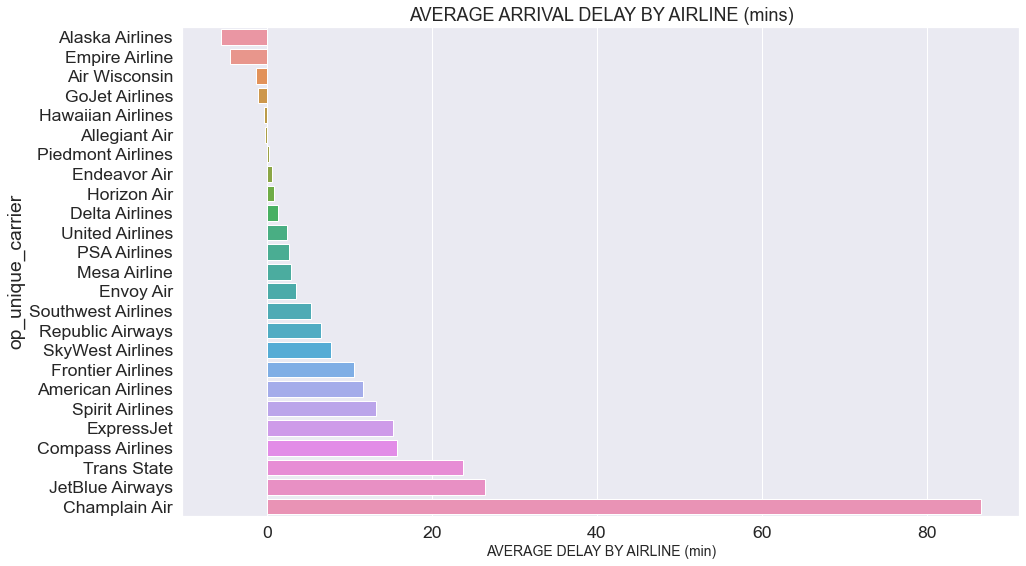

In [47]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='avg_delay', y='op_unique_carrier', data=test_3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

## Worse & Best months to travel based on flight delays

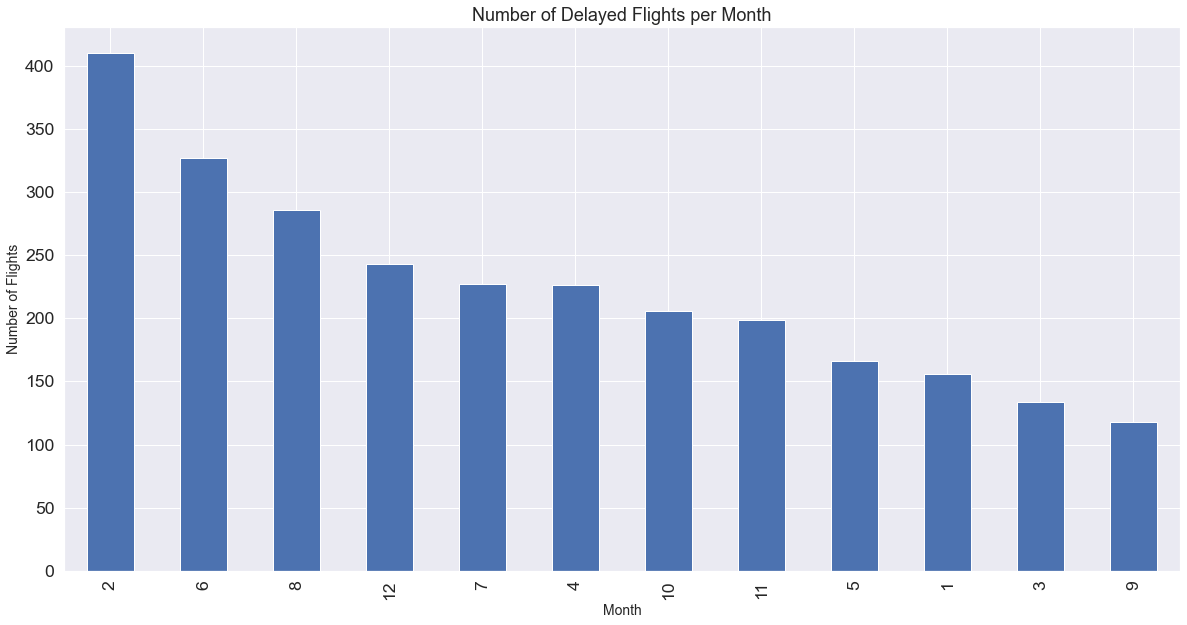

In [48]:
plt.figure(figsize=(20, 10))
df.groupby('fl_month').flight_status.sum().sort_values(ascending=False).plot.bar()
plt.title('Number of Delayed Flights per Month', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

## Impact of Delays (Departure vs. Arrival Delay)

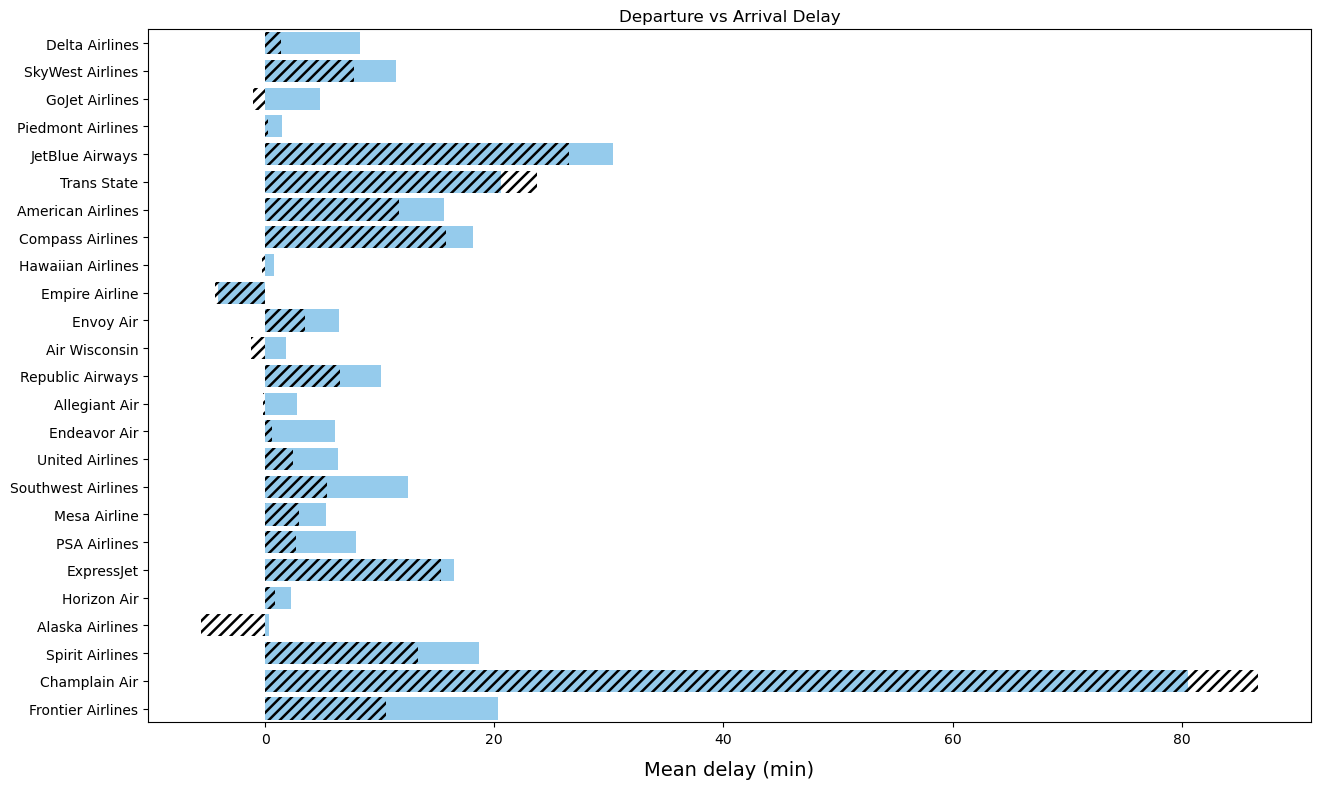

In [50]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="dep_delay", y="op_unique_carrier", data=df, color="lightskyblue", ci=None)
ax = sns.barplot(x="arr_delay", y="op_unique_carrier", data=df, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10);